In [11]:
import time
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction import DictVectorizer as DV
from sklearn.model_selection import cross_val_score

In [12]:
bank_data = pd.read_csv("data/bank-full.csv",delimiter=';')
features = list(bank_data.columns.values)
numeric_col = ['age','balance','day','duration','campaign','pdays','previous']
x_num_train = bank_data[numeric_col].as_matrix()

#categorical columns
bank_train = bank_data.drop(numeric_col+['y'],axis = 1)
x_bank_train = bank_train.T.to_dict().values()

#vectorize
vectorizer = DV( sparse = False )
vec_x_bank_train = vectorizer.fit_transform( x_bank_train )
feature_train = np.hstack(( x_num_train, vec_x_bank_train ))

#y
label_train = bank_data.as_matrix(columns=['y'])

# sample part of data to reduce computing time
train_X,test_X,train_y,test_y = train_test_split(feature_train,label_train,test_size=0.5,random_state=0)

train_X,test_X,train_y,test_y = train_test_split(train_X,train_y,test_size=0.2,random_state=0)
#train_X,val_X,train_y,val_y = train_test_split(train_X,train_y,test_size=0.2,random_state=0)



In [13]:
K_accuracy = dict()

In [14]:
t_list = list()
for k in range(1,40):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(train_X,train_y)
    #predicted= model.predict(val_X)
    tpredicted = model.predict(train_X)
    t_accuracy = accuracy_score(tpredicted,train_y)
    val_accuracy = cross_val_score(model, train_X,train_y, cv=3).mean()
    t_list.append(t_accuracy)
    K_accuracy[k] = val_accuracy

/home/jimmy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/home/jimmy/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jimmy/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jimmy/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector 

/home/jimmy/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jimmy/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jimmy/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jimmy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column

/home/jimmy/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jimmy/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jimmy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/home/jimmy/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector 

/home/jimmy/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jimmy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/home/jimmy/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jimmy/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector 

/home/jimmy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/home/jimmy/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jimmy/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jimmy/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector 

/home/jimmy/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jimmy/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jimmy/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jimmy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column

k =  1  accuracy =  0.851470913515
k =  2  accuracy =  0.880723291307
k =  3  accuracy =  0.875580623756
k =  4  accuracy =  0.883156381332
k =  5  accuracy =  0.883266976333
k =  6  accuracy =  0.885644768856
k =  7  accuracy =  0.88597655386
k =  8  accuracy =  0.886640123866
k =  9  accuracy =  0.885810661358
k =  10  accuracy =  0.884649413846
k =  11  accuracy =  0.88597655386
k =  12  accuracy =  0.885202388852
k =  13  accuracy =  0.886806016368
k =  14  accuracy =  0.886584826366
k =  15  accuracy =  0.886418933864
k =  16  accuracy =  0.886806016368
k =  17  accuracy =  0.885478876355
k =  18  accuracy =  0.886474231365
k =  19  accuracy =  0.887248396372
k =  20  accuracy =  0.886474231365
k =  21  accuracy =  0.887248396372
k =  22  accuracy =  0.886806016368
k =  23  accuracy =  0.886695421367
k =  24  accuracy =  0.88603185136
k =  25  accuracy =  0.886363636364
k =  26  accuracy =  0.886197743862
k =  27  accuracy =  0.886861313869
k =  28  accuracy =  0.886806016368
k = 

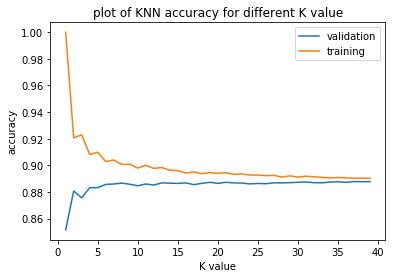

In [15]:
for k,v in K_accuracy.items():
    print("k = ",k," accuracy = ",v)

plt.plot(range(1,40),K_accuracy.values(),label="validation")
plt.plot(range(1,40),t_list,label = "training")
plt.xlabel('K value')
plt.ylabel('accuracy')
plt.title('plot of KNN accuracy for different K value')
plt.legend()
plt.savefig("KNN_bank_1.jpg")
plt.show()

In [16]:
sorted_K_accuracy = sorted(K_accuracy.items(), key=lambda kv: kv[1],reverse=True)
for k,v in sorted_K_accuracy:
    print("k = ",k," accuracy = ",v)


k =  39  accuracy =  0.887801371378
k =  37  accuracy =  0.887801371378
k =  38  accuracy =  0.887690776377
k =  35  accuracy =  0.887635478876
k =  31  accuracy =  0.887469586375
k =  34  accuracy =  0.887414288874
k =  21  accuracy =  0.887248396372
k =  30  accuracy =  0.887248396372
k =  19  accuracy =  0.887248396372
k =  36  accuracy =  0.887193098872
k =  29  accuracy =  0.88697190887
k =  32  accuracy =  0.88697190887
k =  27  accuracy =  0.886861313869
k =  33  accuracy =  0.886861313869
k =  28  accuracy =  0.886806016368
k =  13  accuracy =  0.886806016368
k =  16  accuracy =  0.886806016368
k =  22  accuracy =  0.886806016368
k =  23  accuracy =  0.886695421367
k =  8  accuracy =  0.886640123866
k =  14  accuracy =  0.886584826366
k =  18  accuracy =  0.886474231365
k =  20  accuracy =  0.886474231365
k =  15  accuracy =  0.886418933864
k =  25  accuracy =  0.886363636364
k =  26  accuracy =  0.886197743862
k =  24  accuracy =  0.88603185136
k =  7  accuracy =  0.8859765538

/home/jimmy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


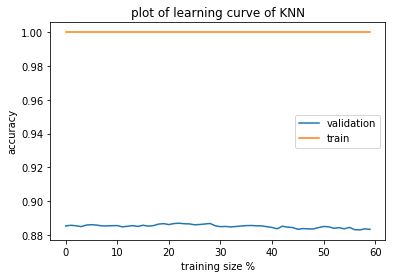

In [17]:
list1=[]
list2=[]
for i in range(20,80):
    clf = KNeighborsClassifier(n_neighbors=23, weights="distance")
    
    X_train, X_test, y_train, y_test = train_test_split(feature_train,label_train, random_state=0, test_size=1-i/100)
    clf.fit(X_train, y_train)
    train_predict = clf.predict(X_train)
    test_predict = clf.predict(X_test)
    list1.append(accuracy_score(y_train, train_predict))
    list2.append(accuracy_score(y_test, test_predict))
plt.plot(range(len(list2)),list2,label='validation')
plt.plot(range(len(list1)),list1,label='train')
plt.xlabel('training size %')
plt.ylabel('accuracy')
plt.title('plot of learning curve of KNN')
plt.legend()
plt.savefig("KNN_bank_2.jpg")
plt.show()

In [18]:
start = time.clock()
model = KNeighborsClassifier(n_neighbors=sorted_K_accuracy[0][0])
model.fit(train_X,train_y)
test_accuracy = accuracy_score(model.predict(test_X),test_y)
elapsed = (time.clock() - start)
print("knn model accuracy: ",test_accuracy,"time used: ",elapsed)

/home/jimmy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


knn model accuracy:  0.889626188896 time used:  0.44008099999996375
